<a href="https://colab.research.google.com/github/SophieShin/ML_selfstudy/blob/main/OptionVolatilityEstimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/Programming for AI')    ## 현재 작업 환경으로 설정한 경로를 입력

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('OptionVolatility.csv', encoding = 'cp949')

In [ ]:
# 마운트 안되는 경우 대비

from google.colab import files
uploaded= files.upload()

Saving OptionVolatility.csv to OptionVolatility.csv


In [ ]:
data.shape

(167849, 14)

In [ ]:
data.info()
# null값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167849 entries, 0 to 167848
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Code                167849 non-null  object 
 1   Name                167849 non-null  object 
 2   Date                167849 non-null  int64  
 3   Types               167849 non-null  object 
 4   CallPut             167849 non-null  object 
 5   StrikePrice         167849 non-null  float64
 6   ScaledStrikePrice   167849 non-null  float64
 7   LastPrice           167849 non-null  float64
 8   RemainingDays       167849 non-null  int64  
 9   RiskFreeRate        167849 non-null  float64
 10  OptionDividendRate  167849 non-null  float64
 11  UnderlyingIndex     167849 non-null  float64
 12  VKOSPI              167849 non-null  float64
 13  ImpliedVolatility   167849 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 17.9+ MB


In [ ]:
data.describe()

,Date,StrikePrice,ScaledStrikePrice,LastPrice,RemainingDays,RiskFreeRate,OptionDividendRate,UnderlyingIndex,VKOSPI,ImpliedVolatility
count,1.678490e+05,167849.000000,167849.000000,167849.000000,167849.000000,167849.000000,167849.000000,167849.000000,167849.000000,167849.000000
mean,2.020090e+07,285.516059,-8.068731,8.044378,78.327276,0.009424,1.164245,305.687886,26.405780,0.314770
std,3.676041e+03,62.472991,23.450348,17.453706,126.295958,0.003253,2.103931,49.848465,10.149168,0.206463
min,2.019120e+07,140.000000,-118.920000,0.010000,1.000000,0.006300,0.000000,199.280000,12.810000,0.030000
25%,2.020032e+07,242.500000,-22.624000,0.230000,21.000000,0.006600,0.000000,278.130000,20.540000,0.191000
50%,2.020070e+07,287.500000,-5.252000,1.540000,44.000000,0.007900,0.606689,297.740000,24.150000,0.260000
75%,2.020102e+07,325.000000,7.676000,7.800000,78.000000,0.011000,0.840140,318.390000,30.200000,0.381000
max,2.021020e+07,500.000000,80.288000,290.200000,1099.000000,0.015300,18.490427,437.300000,69.240000,5.775000


In [ ]:
data.columns

Index(['Code', 'Name', 'Date', 'Types', 'CallPut', 'StrikePrice',
       'ScaledStrikePrice', 'LastPrice', 'RemainingDays', 'RiskFreeRate',
       'OptionDividendRate', 'UnderlyingIndex', 'VKOSPI', 'ImpliedVolatility'],
      dtype='object')

In [4]:
# Feature(X)와 Target(y) 선언하기

X = data[['CallPut','ScaledStrikePrice', 'LastPrice', 'RemainingDays', 'RiskFreeRate', 'OptionDividendRate', 'UnderlyingIndex', 'VKOSPI']]
y = data['ImpliedVolatility']

In [ ]:
X

,CallPut,ScaledStrikePrice,LastPrice,RemainingDays,RiskFreeRate,OptionDividendRate,UnderlyingIndex,VKOSPI
0,C,-39.180,95.00,10,0.0070,0.000000,415.45,34.16
1,C,-36.180,88.30,10,0.0070,0.000000,415.45,34.16
2,C,-36.180,89.20,39,0.0070,0.000000,415.45,34.16
3,C,-30.180,80.55,130,0.0070,0.606411,415.45,34.16
4,C,-26.180,52.00,10,0.0070,0.000000,415.45,34.16
...,...,...,...,...,...,...,...,...
167844,P,-0.976,0.70,4,0.0153,0.000000,277.44,13.96
167845,P,0.024,1.56,4,0.0153,0.000000,277.44,13.96
167846,P,1.024,2.99,4,0.0153,0.000000,277.44,13.96
167847,P,2.024,5.25,4,0.0153,0.000000,277.44,13.96


In [5]:
# categorical data(CallPut) one-hot-encoding 하기
X_features_ohe = pd.get_dummies(X, columns = ['CallPut'])
X_features_ohe

,ScaledStrikePrice,LastPrice,RemainingDays,RiskFreeRate,OptionDividendRate,UnderlyingIndex,VKOSPI,CallPut_C,CallPut_P
0,-39.180,95.00,10,0.0070,0.000000,415.45,34.16,1,0
1,-36.180,88.30,10,0.0070,0.000000,415.45,34.16,1,0
2,-36.180,89.20,39,0.0070,0.000000,415.45,34.16,1,0
3,-30.180,80.55,130,0.0070,0.606411,415.45,34.16,1,0
4,-26.180,52.00,10,0.0070,0.000000,415.45,34.16,1,0
...,...,...,...,...,...,...,...,...,...
167844,-0.976,0.70,4,0.0153,0.000000,277.44,13.96,0,1
167845,0.024,1.56,4,0.0153,0.000000,277.44,13.96,0,1
167846,1.024,2.99,4,0.0153,0.000000,277.44,13.96,0,1
167847,2.024,5.25,4,0.0153,0.000000,277.44,13.96,0,1


In [ ]:
!pip install mglearn

import mglearn

features =pd.DataFrame(X_features_ohe, columns=X_features_ohe.columns)
pd.plotting.scatter_matrix(features, figsize=(15,15),marker='o',hist_kwds={'bins':20},s=60,alpha=.8,cmap=mglearn.cm3)

     |████████████████████████████████| 540 kB 6.6 MB/s 
ERROR: Operation cancelled by user


ModuleNotFoundError: ignored

In [6]:
# train, test set 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X_features_ohe, y, test_size=0.3, random_state=5)

In [7]:
# 차원 확인

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((117494, 9), (50355, 9), (117494,), (50355,))

In [8]:
# 정규화

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

# *Linear Regression 계열

In [ ]:
# 1번 Linear Regression 모델

from sklearn.linear_model import LinearRegression
lr =LinearRegression()
lr.fit(train_scaled, y_train)
pred = lr.predict(test_scaled)

print('Training accuracy : {:.3f}'.format(lr.score(train_scaled,y_train)))
print('Test accuracy : {:.3f}'.format(lr.score(test_scaled, y_test)))


Training accuracy : 0.412
Test accuracy : 0.410


In [ ]:
lr_acc =[lr.score(train_scaled, y_train), lr.score(test_scaled, y_test)]
acc = pd.DataFrame(lr_acc)
acc.columns = ['lr_acc']
acc

,lr_acc
0,0.412282
1,0.409878


In [ ]:

# 2번 Ridge 모델

from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 10)
ridge.fit(train_scaled, y_train)

print('Training accuracy : {:.3f}'.format(ridge.score(train_scaled,y_train)))
print('Test accuracy : {:.3f}'.format(ridge.score(test_scaled, y_test)))

Training accuracy : 0.412
Test accuracy : 0.410


In [ ]:
lr_ridge = [ridge.score(train_scaled,y_train),ridge.score(test_scaled, y_test)]
acc['lr_ridge'] = lr_ridge
acc

,lr_acc,lr_ridge
0,0.412282,0.412282
1,0.409878,0.409877


In [ ]:
# 3번 Lasso 모델
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(train_scaled, y_train)

print('Training accuracy : {:.3f}'.format(lasso.score(train_scaled,y_train)))
print('Test accuracy : {:.3f}'.format(lasso.score(test_scaled, y_test)))

Training accuracy : 0.399
Test accuracy : 0.395


In [ ]:
lr_lasso = [lasso.score(train_scaled,y_train),lasso.score(test_scaled, y_test) ]
acc['lr_lasso']= lr_lasso
acc

,lr_acc,lr_ridge,lr_lasso
0,0.412282,0.412282,0.398682
1,0.409878,0.409877,0.395246


# * Tree 계열

In [ ]:
# 1번 모델 Decision Tree(Single Model)

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=5)
dt.fit(train_scaled, y_train)

print(dt.score(train_scaled, y_train))
print(dt.score(test_scaled, y_test))

1.0
0.9559698676609052


In [ ]:
dtr = [dt.score(train_scaled, y_train),dt.score(test_scaled, y_test)]
acc['dtr'] = dtr
acc


,lr_acc,lr_ridge,lr_lasso,dtr
0,0.412282,0.412282,0.398682,1.00000
1,0.409878,0.409877,0.395246,0.95597


In [ ]:
# 2번 모델 RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor(n_estimators = 100,n_jobs = -1,oob_score = True, random_state = 5)
forest.fit(train_scaled, y_train)

RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=5)

In [ ]:
# RandomForest 성능

print('Training accuracy : {:.3f}'.format(forest.score(train_scaled,y_train)))
print('Test accuracy : {:.3f}'.format(forest.score(test_scaled, y_test)))

Training accuracy : 0.994
Test accuracy : 0.969


In [ ]:
rf = [forest.score(train_scaled,y_train),forest.score(test_scaled, y_test)]
acc['rf'] = rf
acc

,lr_acc,lr_ridge,lr_lasso,dtr,rf
0,0.412282,0.412282,0.398682,1.00000,0.994496
1,0.409878,0.409877,0.395246,0.95597,0.969067


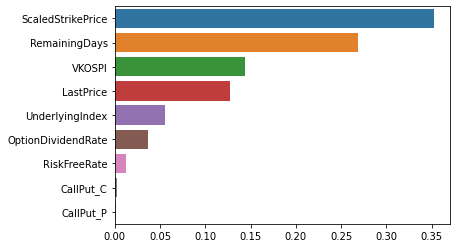

In [ ]:
# feature importance 비교
import seaborn as sns
feature_series = pd.Series(data = forest.feature_importances_, index = X_features_ohe.columns)
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x = feature_series, y = feature_series.index)

In [ ]:
# 3번 모델 Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state = 0)
gbr.fit(train_scaled, y_train)

GradientBoostingRegressor(random_state=0)

In [ ]:
# Gradient Boosting Regressor 성능

print('Training accuracy : {:.3f}'.format(gbr.score(train_scaled,y_train)))
print('test Accuracy: {:.3f}'.format(gbr.score(test_scaled, y_test)))


Training accuracy : 0.872
test Accuracy: 0.879


In [ ]:
gb = [gbr.score(train_scaled,y_train),gbr.score(test_scaled, y_test)]
acc['gb'] = gb
acc

,lr_acc,lr_ridge,lr_lasso,dtr,rf,gb
0,0.412282,0.412282,0.398682,1.00000,0.994496,0.871943
1,0.409878,0.409877,0.395246,0.95597,0.969067,0.878528


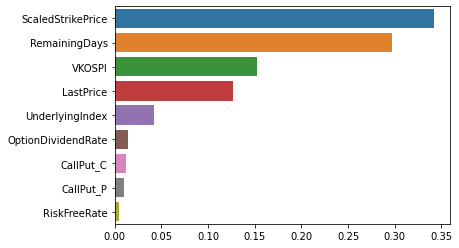

In [ ]:
# feature importance 비교

feature_series = pd.Series(data = gbr.feature_importances_, index = X_features_ohe.columns)
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x = feature_series, y = feature_series.index)

In [ ]:
# 4번 모델 AdaBoost 모델
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor(random_state = 0)
abr.fit(train_scaled, y_train)

AdaBoostRegressor(random_state=0)

In [ ]:
print('Training accuracy : {:.3f}'.format(abr.score(train_scaled,y_train)))
print('test Accuracy: {:.3f}'.format(abr.score(test_scaled, y_test)))

Training accuracy : -0.192
test Accuracy: -0.175


In [ ]:
ada = [abr.score(train_scaled,y_train),abr.score(test_scaled, y_test)]
acc['ada'] = ada
acc

,lr_acc,lr_ridge,lr_lasso,dtr,rf,gb,ada
0,0.412282,0.412282,0.398682,1.00000,0.994496,0.871943,-0.191675
1,0.409878,0.409877,0.395246,0.95597,0.969067,0.878528,-0.174882


In [ ]:
acc.index=['Training Accuracy', 'Test Accuracy']
acc

,lr_acc,lr_ridge,lr_lasso,dtr,rf,gb,ada
Training Accuracy,0.412282,0.412282,0.398682,1.00000,0.994496,0.871943,-0.191675
Test Accuracy,0.409878,0.409877,0.395246,0.95597,0.969067,0.878528,-0.174882


In [ ]:
# 5번 모델 Bagging

from sklearn.ensemble import BaggingRegressor

bagging = BaggingRegressor(DecisionTreeRegressor(), n_estimators =100, oob_score = True, n_jobs = -1, random_state = 0 )
bagging.fit(train_scaled, y_train)


BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100,
                 n_jobs=-1, oob_score=True, random_state=0)

In [ ]:
print('Training accuracy : {:.3f}'.format(bagging.score(train_scaled,y_train)))
print('test Accuracy: {:.3f}'.format(bagging.score(test_scaled, y_test)))
print('OOB sample Accuracy : {:.3f}'.format(bagging.oob_score_))

Training accuracy : 0.994
test Accuracy: 0.969
OOB sample Accuracy : 0.959


In [ ]:
bag = [bagging.score(train_scaled,y_train),bagging.score(test_scaled, y_test)]
acc['bag'] = bag
acc

,lr_acc,lr_ridge,lr_lasso,dtr,rf,gb,ada,bag
Training Accuracy,0.412282,0.412282,0.398682,1.00000,0.994496,0.871943,-0.191675,0.994259
Test Accuracy,0.409878,0.409877,0.395246,0.95597,0.969067,0.878528,-0.174882,0.968916


In [ ]:
# SVR 모델

from sklearn.svm import LinearSVR
svr= LinearSVR(max_iter = 10000)
svr.fit(train_scaled,y_train)

print("훈련 세트 정확도: {:.2f}".format(svr.score(train_scaled,y_train)))
print("테스트 세트 정확도:{:.2f}".format(svr.score(test_scaled,y_test)))


훈련 세트 정확도: 0.38
테스트 세트 정확도:0.37


In [ ]:
svr = [svr.score(train_scaled,y_train),svr.score(test_scaled,y_test)]
acc['svr'] = svr
acc

,lr_acc,lr_ridge,lr_lasso,dtr,rf,gb,ada,bag,svr
Training Accuracy,0.412282,0.412282,0.398682,1.00000,0.994496,0.871943,-0.191675,0.994259,0.377710
Test Accuracy,0.409878,0.409877,0.395246,0.95597,0.969067,0.878528,-0.174882,0.968916,0.374226


In [ ]:
# K-Nearest Neighbors 모델
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor()
knn.fit(train_scaled,y_train)

print("훈련 세트 정확도: {:.2f}".format(knn.score(train_scaled,y_train)))
print("테스트 세트 정확도:{:.2f}".format(knn.score(test_scaled,y_test)))

훈련 세트 정확도: 0.93
테스트 세트 정확도:0.90


In [ ]:
knn = [knn.score(train_scaled,y_train),knn.score(test_scaled,y_test)]
acc['knn'] = knn
acc

,lr_acc,lr_ridge,lr_lasso,dtr,rf,gb,ada,bag,svr,knn
Training Accuracy,0.412282,0.412282,0.398682,1.00000,0.994496,0.871943,-0.191675,0.994259,0.377710,0.932282
Test Accuracy,0.409878,0.409877,0.395246,0.95597,0.969067,0.878528,-0.174882,0.968916,0.374226,0.904783


In [ ]:
acc.columns = ['Linear Regression', 'Ridge', 'Lasso','Decistion Tree', 'Random Forest', ' Gradient Boosting', 'Adagrad Boosting', 'Bagging', 'SVR', 'KNN']
acc

,Linear Regression,Ridge,Lasso,Decistion Tree,Random Forest,Gradient Boosting,Adagrad Boosting,Bagging,SVR,KNN
Training Accuracy,0.412282,0.412282,0.398682,1.00000,0.994496,0.871943,-0.191675,0.994259,0.377710,0.932282
Test Accuracy,0.409878,0.409877,0.395246,0.95597,0.969067,0.878528,-0.174882,0.968916,0.374226,0.904783


In [ ]:
acc.to_numpy()

array([[ 0.41228249,  0.41228248,  0.39868247,  1.        ,  0.99449553,
         0.87194276, -0.19167482,  0.99425896,  0.37770956,  0.93228238],
       [ 0.4098781 ,  0.40987733,  0.39524592,  0.95596987,  0.96906717,
         0.87852793, -0.17488193,  0.96891568,  0.37422586,  0.90478297]])

ValueError: ignored

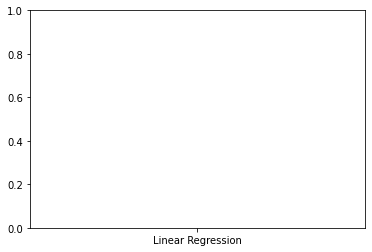

In [ ]:
x = acc.columns
y = acc.to_numpy()

plt.plot(x, y)

## PCA


In [14]:
# PCA

from sklearn.decomposition import PCA

pca = PCA()
ss.fit(X_features_ohe)
X_scaled = ss.transform(X_features_ohe)

pca.fit(X_scaled)
pca_data = pca.transform(X_scaled)
df_pca = pd.DataFrame(pca_data)
df_pca.columns = ['PC'+ str(i) for i in range(1,10)]
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.436696,-0.673416,3.654752,3.093123,3.284432,-0.659482,1.036261,-0.171266,-1.376268e-15
1,0.467310,-0.713704,3.541771,2.865997,2.979109,-0.608871,1.066116,-0.159443,-1.376268e-15
2,0.471572,-0.552815,3.563906,2.925306,2.977594,-0.609215,1.072747,0.000014,-1.376268e-15
3,0.544156,0.077991,3.467736,2.723706,2.396791,-0.477114,1.130396,0.319611,-1.265246e-15
4,0.502962,-0.928085,2.954006,1.653405,1.362111,-0.562070,1.222838,-0.105829,-1.154224e-15
...,...,...,...,...,...,...,...,...,...
167844,-0.488737,-0.204609,-1.740281,-1.545128,1.218467,0.515993,0.154316,0.058511,6.127417e-17
167845,-0.463827,-0.200301,-1.731173,-1.519951,1.249416,0.559863,0.151598,0.059306,6.127417e-17
167846,-0.436208,-0.192725,-1.713446,-1.476183,1.304821,0.608708,0.146545,0.059521,6.127417e-17
167847,-0.404643,-0.180389,-1.683170,-1.405346,1.395839,0.664797,0.138093,0.058891,6.127417e-17


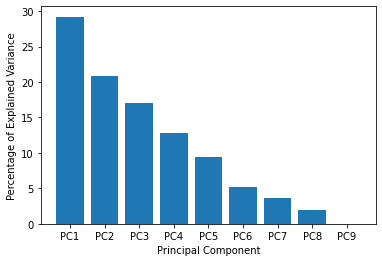

In [31]:
import matplotlib.pyplot as plt

per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.show()

In [19]:
# train, test set 분리

from sklearn.model_selection import train_test_split

X_pca_train, X_pca_test, y_pca_train, y_pca_test =  train_test_split(df_pca[['PC1', 'PC2', 'PC3']], y, test_size=0.3, random_state=5)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((117494, 9), (50355, 9), (117494,), (50355,))

In [21]:
X_pca_train.shape, X_pca_test.shape, y_pca_train.shape, y_pca_test.shape

((117494, 3), (50355, 3), (117494,), (50355,))

In [22]:
# linear regression

from sklearn.linear_model import LinearRegression
lr =LinearRegression()
lr.fit(X_pca_train, y_pca_train)
pred = lr.predict(X_pca_test)

print('Training accuracy : {:.3f}'.format(lr.score(X_pca_train, y_pca_train)))
print('Test accuracy : {:.3f}'.format(lr.score(X_pca_test, y_pca_test)))


Training accuracy : 0.172
Test accuracy : 0.173


In [23]:
# Ridge

from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 10)
ridge.fit(X_pca_train, y_pca_train)

print('Training accuracy : {:.3f}'.format(ridge.score(X_pca_train, y_pca_train)))
print('Test accuracy : {:.3f}'.format(ridge.score(X_pca_test, y_pca_test)))

Training accuracy : 0.172
Test accuracy : 0.173


In [25]:
# Lasso 모델
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_pca_train, y_pca_train)

print('Training accuracy : {:.3f}'.format(lasso.score(X_pca_train, y_pca_train)))
print('Test accuracy : {:.3f}'.format(lasso.score(X_pca_test, y_pca_test)))

Training accuracy : 0.168
Test accuracy : 0.169


In [26]:
# Decision Tree(Single Model)

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=5)
dt.fit(X_pca_train, y_pca_train)

print(dt.score(X_pca_train, y_pca_train))
print(dt.score(X_pca_test, y_pca_test))

1.0
0.8916376410209784


In [27]:
# 2번 모델 RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor(n_estimators = 100,n_jobs = -1,oob_score = True, random_state = 5)
forest.fit(X_pca_train, y_pca_train)

print('Training accuracy : {:.3f}'.format(forest.score(X_pca_train, y_pca_train)))
print('Test accuracy : {:.3f}'.format(forest.score(X_pca_test, y_pca_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


Training accuracy : 0.989
Test accuracy : 0.931


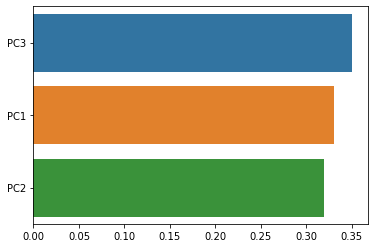

In [29]:
# feature importance 비교
import seaborn as sns
feature_series = pd.Series(data = forest.feature_importances_, index = df_pca[['PC1', 'PC2', 'PC3']].columns)
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x = feature_series, y = feature_series.index)

In [32]:
# AdaBoost 모델
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor(random_state = 0)
abr.fit(X_pca_train, y_pca_train)

print('Training accuracy : {:.3f}'.format(abr.score(X_pca_train, y_pca_train)))
print('test Accuracy: {:.3f}'.format(abr.score(X_pca_test, y_pca_test)))

Training accuracy : -3.727
test Accuracy: -3.629


In [33]:
# 5번 모델 Bagging

from sklearn.ensemble import BaggingRegressor

bagging = BaggingRegressor(DecisionTreeRegressor(), n_estimators =100, oob_score = True, n_jobs = -1, random_state = 0 )
bagging.fit(X_pca_train, y_pca_train)

print('Training accuracy : {:.3f}'.format(bagging.score(X_pca_train, y_pca_train)))
print('test Accuracy: {:.3f}'.format(bagging.score(X_pca_test, y_pca_test)))
print('OOB sample Accuracy : {:.3f}'.format(bagging.oob_score_))

Training accuracy : 0.989
test Accuracy: 0.933
OOB sample Accuracy : 0.920


In [35]:
# SVR 모델

from sklearn.svm import LinearSVR
svr= LinearSVR(max_iter = 10000)
svr.fit(X_pca_train, y_pca_train)

print("훈련 세트 정확도: {:.2f}".format(svr.score(X_pca_train, y_pca_train)))
print("테스트 세트 정확도:{:.2f}".format(svr.score(X_pca_test, y_pca_test)))


훈련 세트 정확도: 0.13
테스트 세트 정확도:0.13


In [34]:
# K-Nearest Neighbors 모델
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor()
knn.fit(X_pca_train, y_pca_train)

print("훈련 세트 정확도: {:.2f}".format(knn.score(X_pca_train, y_pca_train)))
print("테스트 세트 정확도:{:.2f}".format(knn.score(X_pca_test, y_pca_test)))

훈련 세트 정확도: 0.90
테스트 세트 정확도:0.86
